<a href="https://colab.research.google.com/github/Manojkumar063/AI_related-projects/blob/main/project_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opencv-python mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 27.6 MB/s eta 0:00:00


In [3]:
import cv2
import mediapipe as mp

def main():
    # Initialize MediaPipe Hands and Drawing modules
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)

    # Capture video from the webcam
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("Failed to capture frame")
            break

        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame to detect hands
        results = hands.process(rgb_frame)

        # Draw landmarks and hand connections if hands are detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2)
                )

        # Display the frame
        cv2.imshow('Hand Gesture Detection', frame)

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


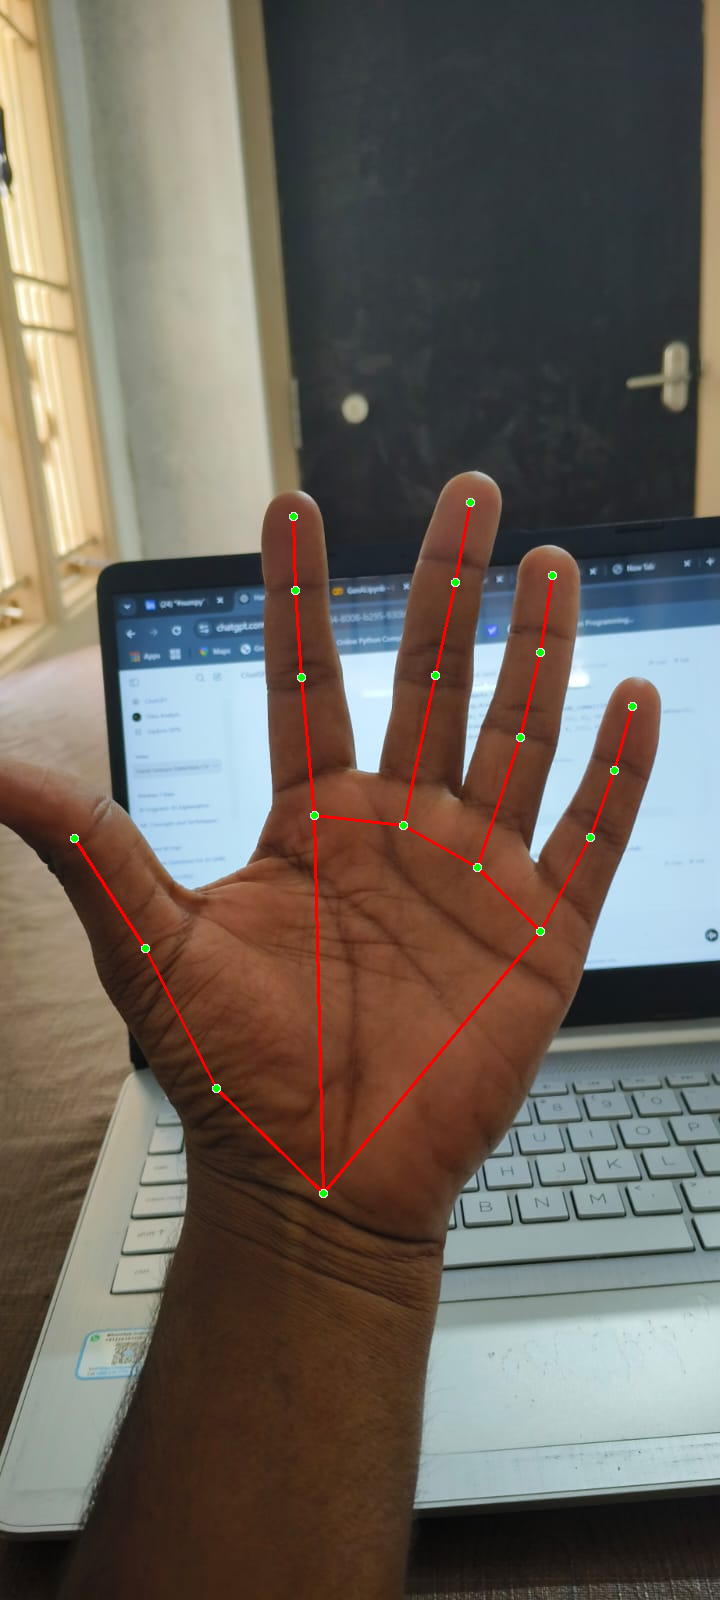

In [6]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

def main():
    # Initialize MediaPipe Hands and Drawing modules
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.7)

    # Path to the input image
    image_path = "/content/hand_For.jpg"  # Replace with your image path
    image = cv2.imread(image_path)

    if image is None:
        print("Failed to load image. Check the path.")
        return

    # Convert the image to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to detect hands
    results = hands.process(rgb_image)

    # Draw landmarks and hand connections if hands are detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2)
            )

    # Display the processed image using cv2_imshow
    cv2_imshow(image)

if __name__ == "__main__":
    main()


In [7]:
from google.colab import files
uploaded = files.upload()


Saving hand_For.jpg to hand_For (1).jpg
